# Principle Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

### PCA on randomly generated numbers from Normal Distribution

In [2]:
np.random.seed(69)

In [8]:
sampleData = np.random.standard_normal((20,2))
sampleData.mean(), sampleData.std()

(0.23434983954545427, 1.0918717834917249)

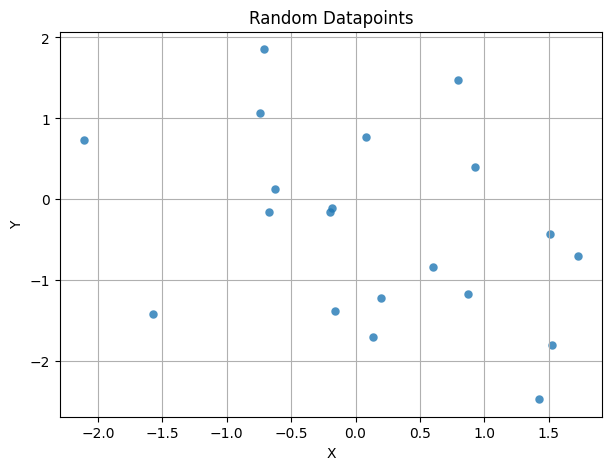

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(sampleData[:,0], sampleData[:,1], linewidth = 0.05, alpha = 0.8)
plt.title("Random Datapoints")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

In [9]:
mat = np.random.rand(2,2)

[[0.4316559  0.39292453]
 [0.19078938 0.86033736]]


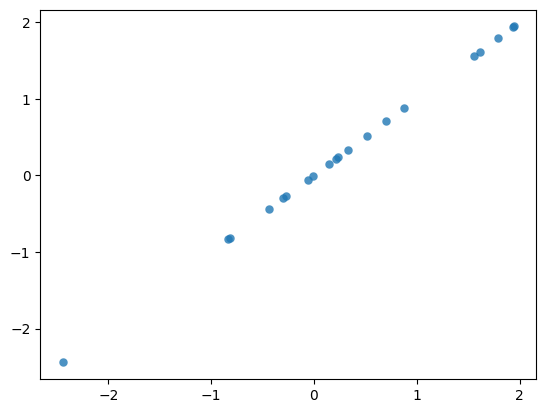

In [11]:
print(mat)
prod = sampleData.dot(mat)
plt.scatter(prod[:,1], prod[:,1], linewidth=0.05, alpha=0.8)

In [12]:
covMat = np.cov(prod.T)
covMat

array([[0.40090287, 0.61240161],
       [0.61240161, 1.20867425]])

In [13]:
eigVal, eigVec = np.linalg.eig(covMat)
eigVal, eigVec

(array([0.07119509, 1.53838203]),
 array([[-0.88049927, -0.47404751],
        [ 0.47404751, -0.88049927]]))

In [17]:
#sorting the eigenvalues and rearranging the eigen vectors to match the sorted eigen values
eigValVec = np.vstack((eigVal, eigVec))
temp = list(zip(*sorted(zip(*eigValVec),reverse = True)))
eigValVec = np.array(temp)
eigVal = eigValVec[0,:]
eigVec = eigValVec[1:,:]
eigVal, eigVec

(array([1.53838203, 0.07119509]),
 array([[-0.47404751, -0.88049927],
        [-0.88049927,  0.47404751]]))

In [19]:
#calculating the proportion of variance each eigen value is able to retain
pov = np.ndarray((2,))
sum_eigVal = np.sum(eigVal)
csum = np.ndarray((2,))
temp = 0
print("POV\tVarianceExplained\tCummulativeSum")
for i in range(0, len(eigVal)):
    pov[i] = eigVal[i]/sum_eigVal
    temp += pov[i]
    csum[i] = temp
    print(f'pov{i+1}\t{pov[i]}\t{csum[i]}')

POV	VarianceExplained	CummulativeSum
pov1	0.9557678304175861	0.9557678304175861
pov2	0.04423216958241398	1.0


In [34]:
#perfroming the reduction Y =PX
y = prod.dot(eigVec)
y

array([[-2.14304852e+00,  1.04227945e-01],
       [-1.83072307e+00,  3.77536805e-01],
       [-2.20650256e+00,  5.78905519e-04],
       [-7.53580345e-02, -2.56155621e-01],
       [ 5.11752706e-01,  3.73215403e-01],
       [-8.96199069e-01,  1.87753804e-01],
       [-6.63459452e-01,  2.50899004e-01],
       [-1.93922689e+00, -1.92702915e-01],
       [-1.57520339e-01,  2.58842316e-02],
       [ 1.06580633e+00,  2.20229719e-01],
       [-2.71245364e-01,  1.91822566e-01],
       [ 3.86450395e-01, -2.02680308e-01],
       [ 3.11080859e-01, -4.98681676e-02],
       [-3.92210396e-01, -2.25259514e-01],
       [-4.80117052e-01, -4.45145151e-01],
       [ 2.61668253e+00, -2.91324613e-01],
       [-3.66316948e-01,  4.08536233e-01],
       [-1.83795029e+00, -1.38985692e-01],
       [ 9.67152580e-02,  1.62509708e-01],
       [ 1.19086317e+00,  4.81002268e-01]])

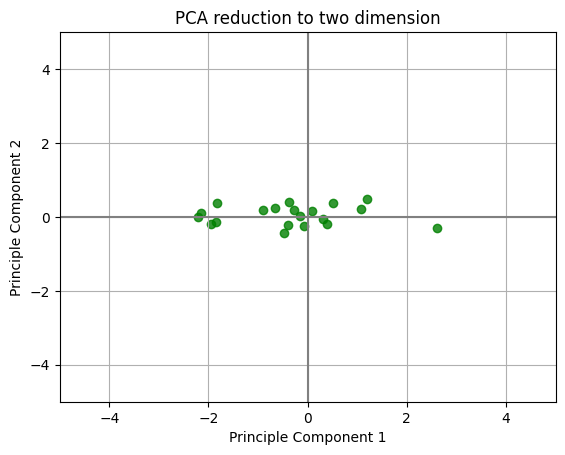

In [38]:
plt.scatter(y[:,0],y[:,1],alpha=0.8, c='green')
plt.title('PCA reduction to two dimension')
plt.xlabel('Principle Component 1')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.ylabel('Principle Component 2')
plt.axhline(y=0, color='grey')
plt.axvline(x=0, color="grey")
plt.grid()

In [28]:
#Performing the reduction in form of Y=PX, reducing to one dimension, retaining 95.57% variance
Y_pca = prod.dot(eigVec[:,0])
Y_pca

array([-2.14304852, -1.83072307, -2.20650256, -0.07535803,  0.51175271,
       -0.89619907, -0.66345945, -1.93922689, -0.15752034,  1.06580633,
       -0.27124536,  0.38645039,  0.31108086, -0.3922104 , -0.48011705,
        2.61668253, -0.36631695, -1.83795029,  0.09671526,  1.19086317])

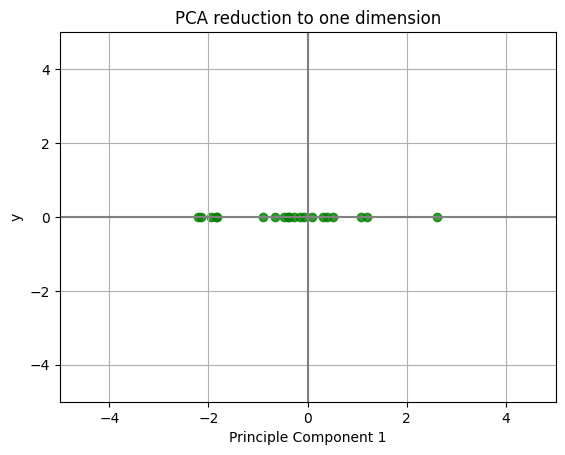

In [36]:
plt.scatter(Y_pca, np.zeros((20,)),alpha=0.8, c='green')
plt.title('PCA reduction to one dimension')
plt.xlabel('Principle Component 1')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.ylabel('y')
plt.axhline(y=0, color='grey')
plt.axvline(x=0, color="grey")
plt.grid()

### PCA for Iris Dataset 

In [42]:
#loading the Iris dataset into a dataframe
iris = datasets.load_iris()
irisDf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDf['target'] = pd.Series(iris.target)
irisDf.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [45]:
#separating the feature values in numpy array X
X_iris = irisDf.iloc[:,0:4].values
#we must check whether the data is standardized or not by seeing mean and standard deviation
print(X_iris.mean(), X_iris.std())

3.4644999999999997 1.9738430577598278


In [46]:
#since the data is not standard, we use StandardScaler to make it standard
X_std = StandardScaler().fit_transform(X_iris)
X_std.mean(), X_std.std()

(-1.4684549872375404e-15, 1.0)

In [49]:
#Now we calculate the covariance matrix for the standard data. Correlation matrix may also be used
varMatIris = np.cov(X_std.T)
varMatIris

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [51]:
# Performing Eigen Value Decomposition using the obtained Covariance Matrix
eigValIris, eigVecIris = np.linalg.eig(varMatIris)
eigValIris, eigVecIris

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [52]:
# Sorting and rearranging the eigen values and eigen Matrix, useful when the eigvalues are not ordered
eigValVec = np.vstack((eigValIris, eigVecIris))
temp = list(zip(*sorted(zip(*eigValVec),reverse = True)))
eigValVec = np.array(temp)
eigValIris = eigValVec[0,:]
eigVecIris = eigValVec[1:,:]
eigValIris, eigVecIris

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [54]:
# Calculating the proportion of variance each eigen value is able to retain
povIris = np.ndarray((4,))
sum_eigValIris = np.sum(eigValIris)
csumIris = np.ndarray((4,))
temp = 0
print("POV\tVarianceExplained\tCummulativeSum")
for i in range(0, len(eigValIris)):
    povIris[i] = eigValIris[i]/sum_eigValIris
    temp += povIris[i]
    csumIris[i] = temp
    print(f'pov{i+1}\t{povIris[i]}\t{csumIris[i]}')

POV	VarianceExplained	CummulativeSum
pov1	0.7296244541329988	0.7296244541329988
pov2	0.22850761786701765	0.9581320720000165
pov3	0.0366892188928287	0.9948212908928452
pov4	0.00517870910715487	1.0


Text(0, 0.5, 'Percentage of Explained Variance')

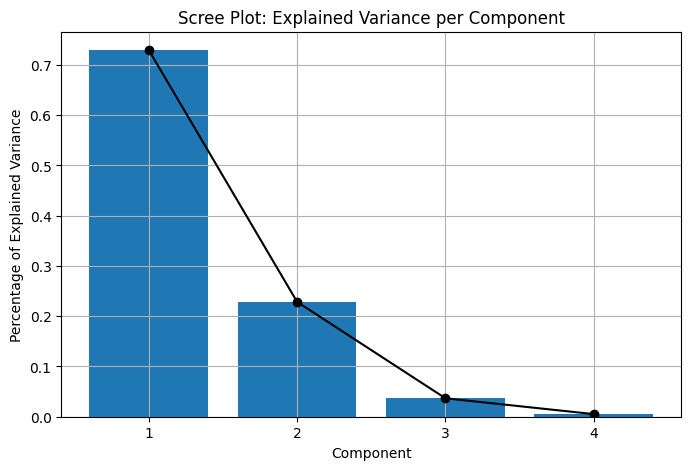

In [59]:
#plotting scree plot for explained variance by each component and 
# cummulative preserved variance along each component
plt.figure(figsize=(8,5))
plt.plot(np.linspace(1,4,4), povIris, 'o-',c='black')
plt.bar(np.linspace(1,4,4),povIris)
plt.title('Scree Plot: Explained Variance per Component')
plt.grid()
plt.xticks(np.arange(1,5,1))
plt.xlabel("Component")
plt.ylabel("Percentage of Explained Variance")

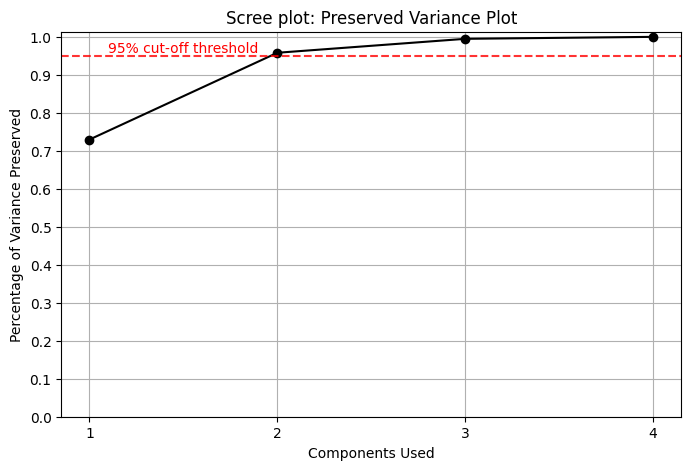

In [67]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(1,4,4), csumIris, 'o-',c='black')
plt.title('Scree plot: Preserved Variance Plot')
plt.xlabel('Components Used')
plt.ylabel('Percentage of Variance Preserved')

plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(0,1.1,0.1))

plt.axhline(y=0.95, color='red', linestyle='--',alpha=0.8)
plt.text(1.1,0.96, '95% cut-off threshold', color='red', fontsize=10)
plt.grid()

In [68]:
# Reducing to two dimensions for preserving 95.81% variance
yIris = X_std.dot(eigVecIris[:,0:2])
yIris.shape

(150, 2)

Text(0.5, 1.0, 'PCA Reduction of Iris Dataset')

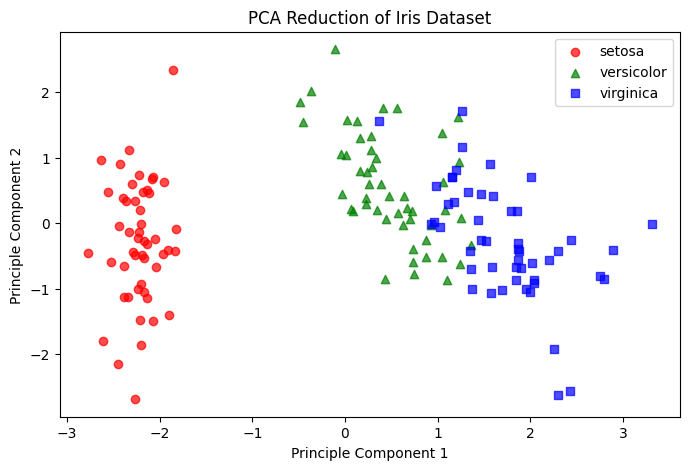

In [78]:
# Plotting the Information along the two major Principle Components
plt.figure(figsize=(8,5))
targetValIris = irisDf.iloc[:,-1].values
for c, i, targetName, mark in zip('rgb', [0,1,2], iris.target_names, "o^s"):
    plt.scatter(yIris[targetValIris==i, 0], yIris[targetValIris==i, 1],
                c=c, label=targetName, marker=mark, alpha = 0.7)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.title('PCA Reduction of Iris Dataset')

In [111]:
# calculating the values of all priciple components
yIrisAll = X_std.dot(eigVecIris)
yIrisAll.shape

(150, 4)

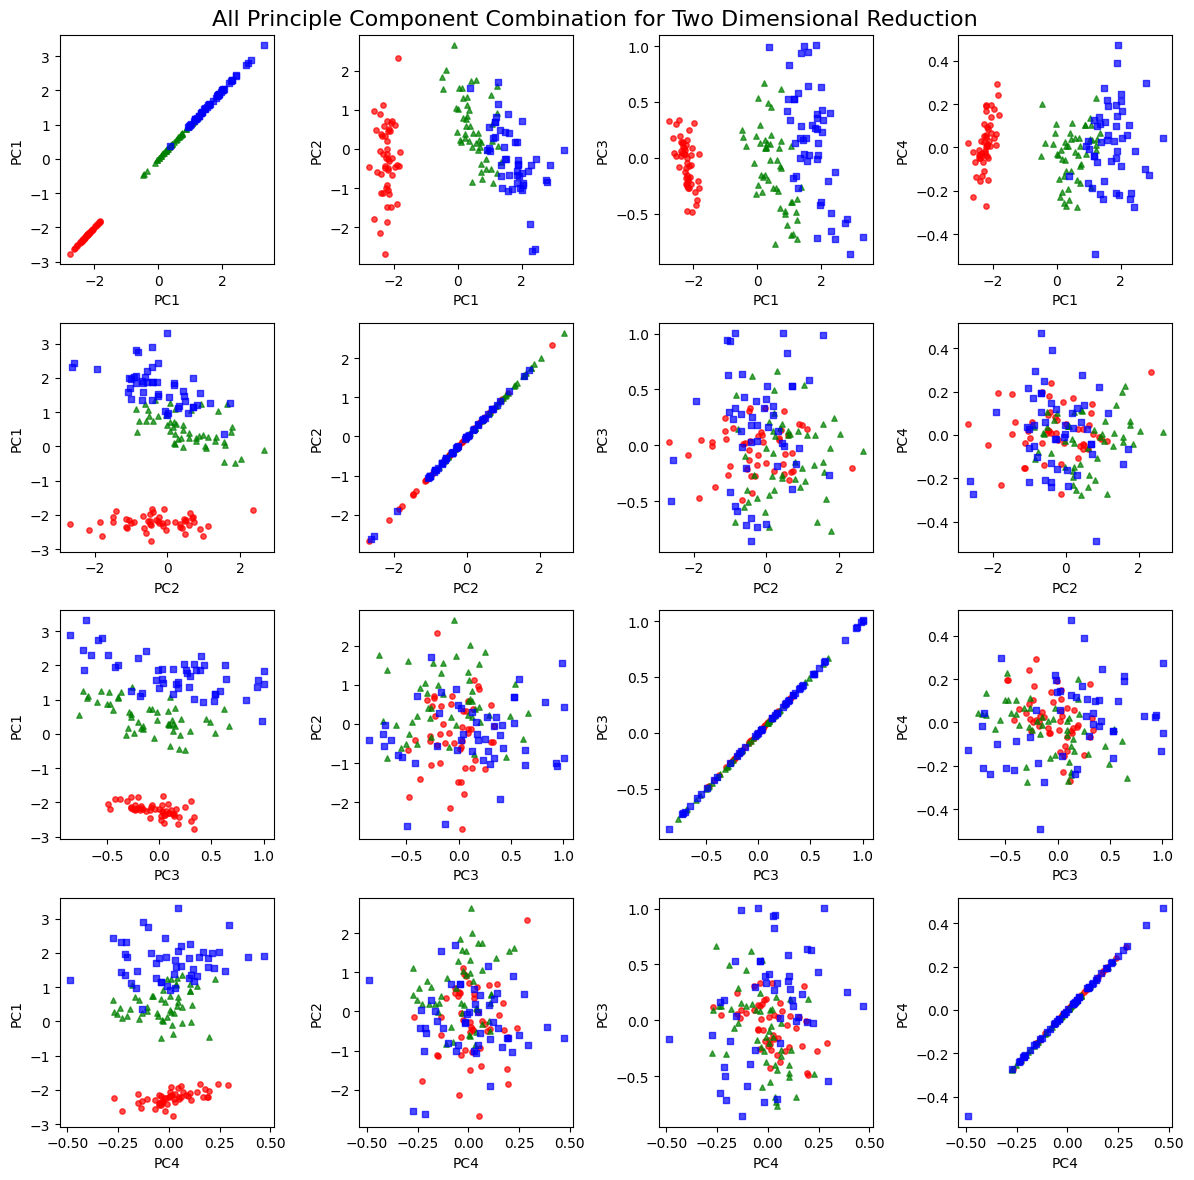

In [119]:
# Plotting all combination two principle components 
rows = 4
cols = 4

fig, axes = plt.subplots(rows,cols,figsize=(12,12))
fig.suptitle('All Principle Component Combination for Two Dimensional Reduction',fontsize=16)

for row in range(0,rows):
    for col in range(0,cols):
        for c, i, targetName, mark in zip('rgb', [0,1,2], iris.target_names, "o^s"):
            axes[row][col].scatter(yIrisAll[targetValIris==i, row], yIrisAll[targetValIris==i, col],
                             c=c, label=targetName, marker=mark, alpha = 0.7, s=15)
#         ax = sns.scatterplot(x=yIrisAll[:,row],
#                              y=yIrisAll[:,col],
#                              ax=axes[row,col])
        axes[row][col].set_xlabel(f'PC{row+1}')
        axes[row][col].set_ylabel(f'PC{col+1}')
plt.tight_layout()

Text(0.5, 0.92, 'PCA Reduction of Iris Dataset to 3 Dimensions')

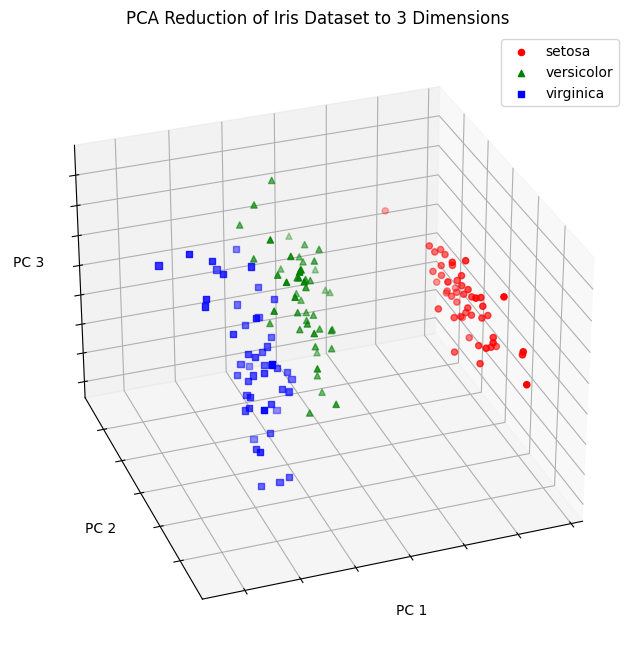

In [116]:
fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111, projection="3d", elev = -150, azim = 110)
for c, i, targetName, mark in zip("rgb", [0,1,2], iris.target_names, "o^s"):
    ax.scatter(yIrisAll[targetValIris==i, 0], yIrisAll[targetValIris==i, 1], yIrisAll[targetValIris==i, 2],
               marker=mark, c=c, label=targetName)
ax.set_xlabel("PC 1")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("PC 2")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("PC 3")
ax.zaxis.set_ticklabels([])
ax.legend()
ax.set_title('PCA Reduction of Iris Dataset to 3 Dimensions')

### PCA for Breast Cancer Dataset

In [117]:
breastCancer = datasets.load_breast_cancer()
cancerDf = pd.DataFrame(breastCancer.data, columns=breastCancer.feature_names)
cancerDf['target'] = pd.Series(breastCancer.target)
cancerDf.head(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [120]:
cancerDf['target'] = cancerDf['target'].apply(lambda x: "Benign" if x==1 else "Malignant")

In [121]:
X_cancer = cancerDf.iloc[:,0:30].values
X_cancer.mean(), X_cancer.std()

(61.890712339519624, 228.29740508276657)

In [122]:
Xbc_std = StandardScaler().fit_transform(X_cancer)
Xbc_std.mean(), Xbc_std.std()

(-6.118909323768877e-16, 1.0)

In [123]:
varMatCancer = np.cov(Xbc_std.T)
varMatCancer.shape

(30, 30)

In [124]:
eigValCancer, eigVecCancer = np.linalg.eig(varMatCancer)
eigValCancer, eigVecCancer

(array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
        1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
        4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
        2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
        5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
        7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
        1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
        3.12142606e-02, 3.00256631e-02]),
 array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
          4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
          1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
          9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
          1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
         -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
         -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
         -2.11194013e-01, -1.31526

In [127]:
# Since the recieved Eigen Values are not in ordered form, reorganizing them
eigValVec = np.vstack((eigValCancer, eigVecCancer))
temp = list(zip(*sorted(zip(*eigValVec),reverse = True)))
eigValVec = np.array(temp)
eigValCancer = eigValVec[0,:]
eigVecCancer = eigValVec[1:,:]
eigValCancer, eigVecCancer

(array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
        1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
        4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
        2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
        5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
        3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
        1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
        7.50121413e-04, 1.33279057e-04]),
 array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
          4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
          1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
          9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
          1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
         -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
         -2.25384659e-01, -4.96986642e-02,  6.85700057e-02,
         -7.29289034e-02,  9.85526

In [128]:
# Calculating the proportion of variance each eigen value is able to retain
povCancer = np.ndarray((30,))
sum_eigValCancer = np.sum(eigValCancer)
csumCancer = np.ndarray((30,))
temp = 0
print("POV\tVarianceExplained\tCummulativeSum")
for i in range(0, len(eigValCancer)):
    povCancer[i] = eigValCancer[i]/sum_eigValCancer
    temp += povCancer[i]
    csumCancer[i] = temp
    print(f'pov{i+1}\t{povCancer[i]}\t{csumCancer[i]}')

POV	VarianceExplained	CummulativeSum
pov1	0.4427202560752634	0.4427202560752634
pov2	0.18971182044033086	0.6324320765155942
pov3	0.09393163257431392	0.7263637090899081
pov4	0.0660213491547014	0.7923850582446095
pov5	0.054957684923462626	0.8473427431680721
pov6	0.040245220398833485	0.8875879635669056
pov7	0.022507337129825115	0.9100953006967307
pov8	0.01588723800021326	0.925982538696944
pov9	0.013896493745591107	0.9398790324425351
pov10	0.011689781894131501	0.9515688143366666
pov11	0.009797189875980165	0.9613660042126468
pov12	0.008705379007378857	0.9700713832200257
pov13	0.008045249871967333	0.978116633091993
pov14	0.005233657454926364	0.9833502905469194
pov15	0.003137832167627401	0.9864881227145468
pov16	0.0026620933651523198	0.9891502160796991
pov17	0.001979967925324263	0.9911301840050234
pov18	0.001753959450226352	0.9928841434552498
pov19	0.0016492530592251702	0.9945333965144749
pov20	0.0010386467483387155	0.9955720432628137
pov21	0.0009990964637002625	0.9965711397265139
pov22	0.000

(0.0, 0.5)

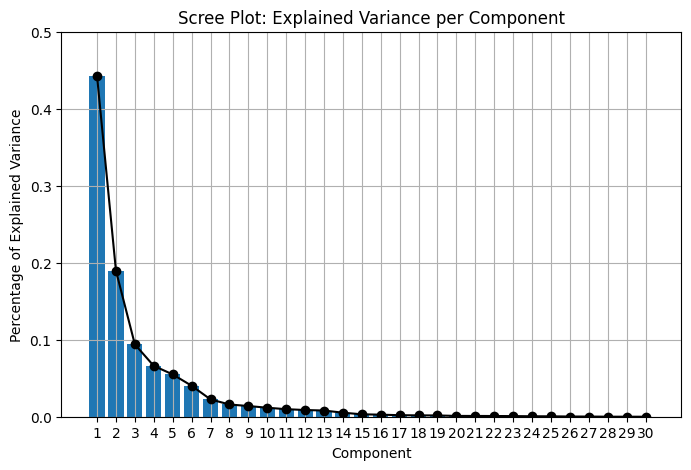

In [130]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(1,30,30), povCancer, 'o-',c='black')
plt.bar(np.linspace(1,30,30),povCancer)
plt.title('Scree Plot: Explained Variance per Component')
plt.grid()
plt.xticks(np.arange(1,31,1))
plt.xlabel("Component")
plt.ylabel("Percentage of Explained Variance")
plt.ylim(0,0.5)

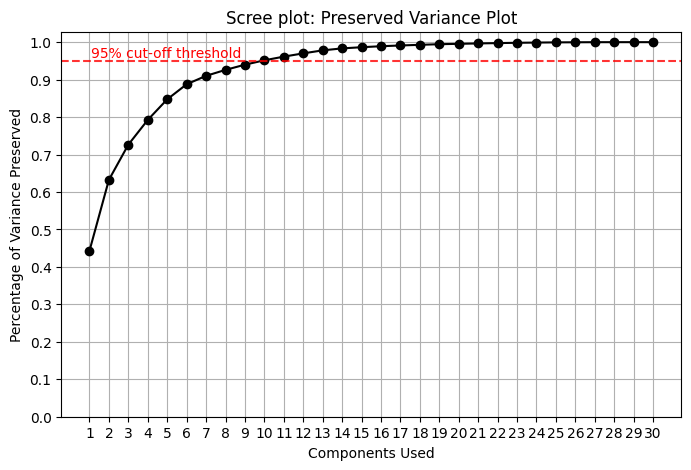

In [131]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(1,30,30), csumCancer, 'o-',c='black')
plt.title('Scree plot: Preserved Variance Plot')
plt.xlabel('Components Used')
plt.ylabel('Percentage of Variance Preserved')

plt.xticks(np.arange(1,31,1))
plt.yticks(np.arange(0,1.1,0.1))

plt.axhline(y=0.95, color='red', linestyle='--',alpha=0.8)
plt.text(1.1,0.96, '95% cut-off threshold', color='red', fontsize=10)
plt.grid()

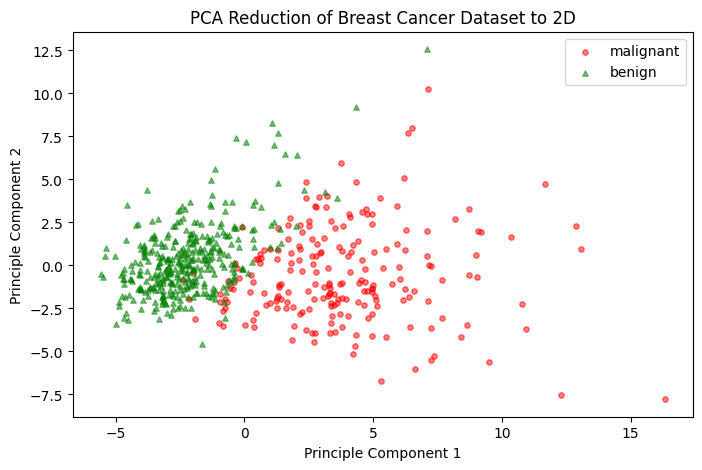

In [142]:
# perform 2 dim reduction and 3 dim reduction for visualization purpose
Ybc_2 = Xbc_std.dot(eigVecCancer[:,0:2])

plt.figure(figsize=(8,5))
ybc = breastCancer.target
for c, i, targetName, mark in zip("rgb", [0,1], breastCancer.target_names, 'o^'):
    plt.scatter(Ybc_2[ybc==i, 0], Ybc_2[ybc==i, 1], c=c, label=targetName, alpha=0.5, marker=mark, s=15)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend()
plt.title('PCA Reduction of Breast Cancer Dataset to 2D')
plt.show()

Text(0.5, 0.92, 'PCA of Breast Cancer Dataset')

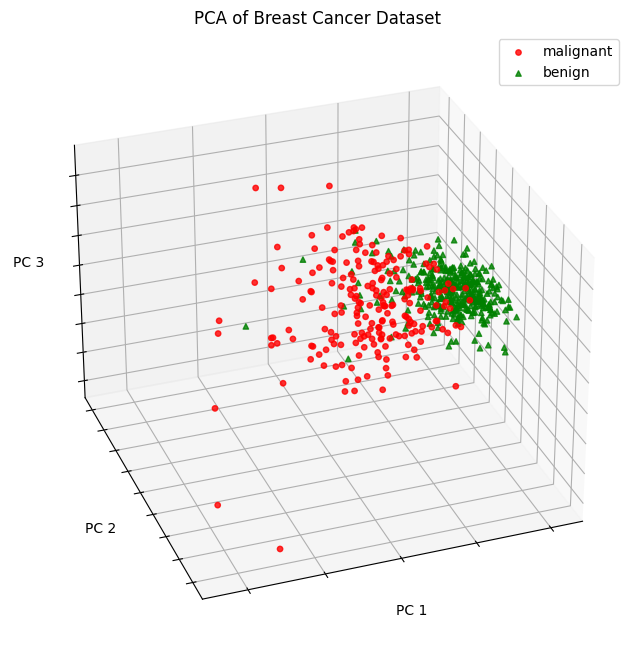

In [145]:
Ybc_3 = Xbc_std.dot(eigVecCancer[:,0:3])

fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111, projection="3d", elev = -150, azim = 110)
for c, i, targetName, mark in zip("rgb", [0,1,2], breastCancer.target_names, 'o^'):
    ax.scatter(Ybc_3[ybc==i, 0], Ybc_3[ybc==i, 1], Ybc_3[ybc==i, 2], c=c, label=targetName, marker=mark, s=15, alpha=0.8)
ax.set_xlabel("PC 1")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("PC 2")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("PC 3")
ax.zaxis.set_ticklabels([])
ax.legend()
ax.set_title('PCA of Breast Cancer Dataset')

In [134]:
Xbc_std.nbytes

136560

In [146]:
Ybc_10 = Xbc_std.dot(eigVecCancer[:,0:10])
Ybc_10.shape, Ybc_10.nbytes

((569, 10), 45520)

#### Using Logistic Regression to analyse the effectiveness of PCA

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [153]:
#separating features and target values 
features_nopca = Xbc_std
features_pca = Ybc_10
# features_nopca.shape, features_pca.shape
target = breastCancer.target

##### Evaluation on Original Data

In [154]:
#spliting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features_nopca, target, 
                                                    test_size=0.3, random_state=69)
#Creating a Logistic Regression Model
NoPcaModel = LogisticRegression()

#Training this model on original data
NoPcaModel.fit(X_train, y_train)

#Making prediction using this model on test set
y_pred = NoPcaModel.predict(X_test)

#Generating a Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        77
           1       0.95      0.99      0.97        94

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



##### Evalution for PCA data

In [155]:
#spliting the dataset into training and testing set
X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(features_pca, target, 
                                                    test_size=0.3, random_state=69)
#Creating a Logistic Regression Model
PcaModel = LogisticRegression()

#Training this model on original data
PcaModel.fit(X_ptrain, y_ptrain)

#Making prediction using this model on test set
y_ppred = PcaModel.predict(X_ptest)

#Generating a Classification Report
reportPca = classification_report(y_ptest, y_ppred)
print('Classification Report:\n', reportPca)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        77
           1       0.95      1.00      0.97        94

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# Extract features and labels
features = data.iloc[:, 1:-1]  # Exclude the first column (ID) and the last column (label)
labels = data.iloc[:, -1]  # Last column contains the labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)